In [1]:
!pip install kaggle

     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------  81.9/83.6 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 83.6/83.6 kB 940.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=1674e5082c1100ee9808482d77c7ad61f399cee2331b4aefd26db732e9dae03a
  Stored in directory: c:\users\kovel\appdata\local\pip\cache\wheels\6a\2b\d0\457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "keerthikovelamudi"
os.environ['KAGGLE_KEY'] = "68882ea8f0478446c20392ee74fff7b0"

In [3]:
!kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                   41MB  2023-11-15 07:32:56            742         72  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset             Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          29120        563  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dataset                      119MB  2023-11-05 14:03:25            886        105  1.0              
joebeachcapital/30000-spotify-songs                            30000 Spotify Songs   

In [5]:
!kaggle datasets download -d uciml/indian-liver-patient-records


  0%|          | 0.00/7.68k [00:00<?, ?B/s]
100%|##########| 7.68k/7.68k [00:00<?, ?B/s]


In [26]:
import zipfile

# Specify the correct file name with the ".zip" extension
zip_file_name = 'indian-liver-patient-records.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('kovel')

In [27]:
# List files and directories in the 'kovel' directory
kovel_contents = os.listdir('kovel')
print("Contents of 'kovel' directory:", kovel_contents)

Contents of 'kovel' directory: ['indian_liver_patient.csv']


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
import os
import pandas as pd

# Specify the file path in the 'kovel' directory
file_path = 'kovel/indian_liver_patient.csv'

# Read the CSV file
patients = pd.read_csv(file_path)

# Display the first few rows of the dataframe
patients.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
patients.shape

(583, 11)

<Axes: >

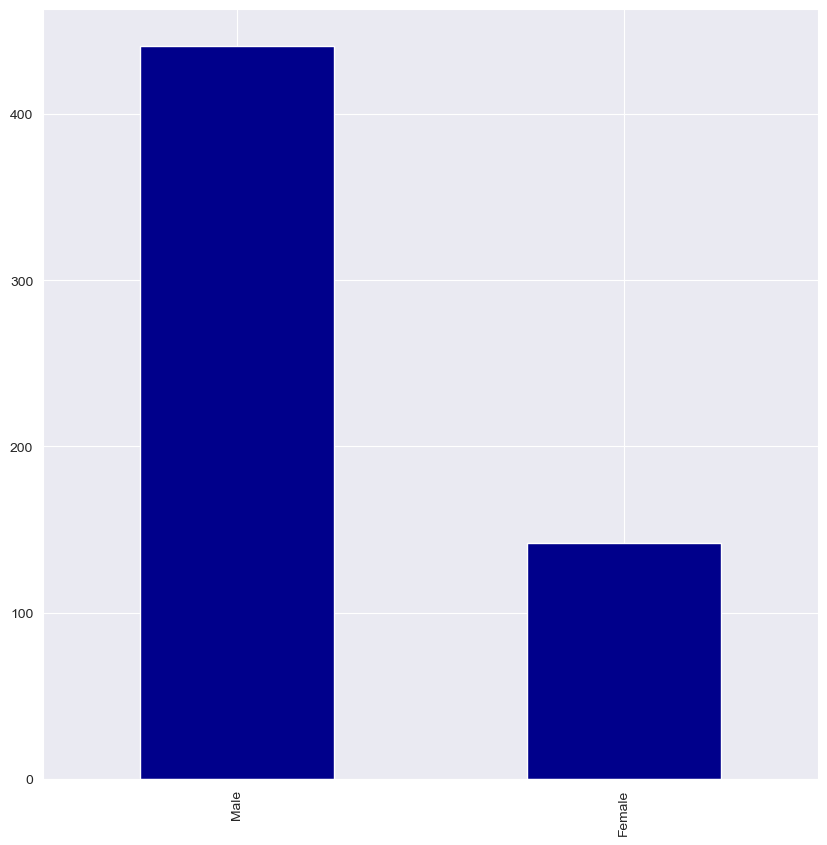

In [66]:
patients['Gender'].value_counts().plot.bar(color='darkblue')

<Axes: >

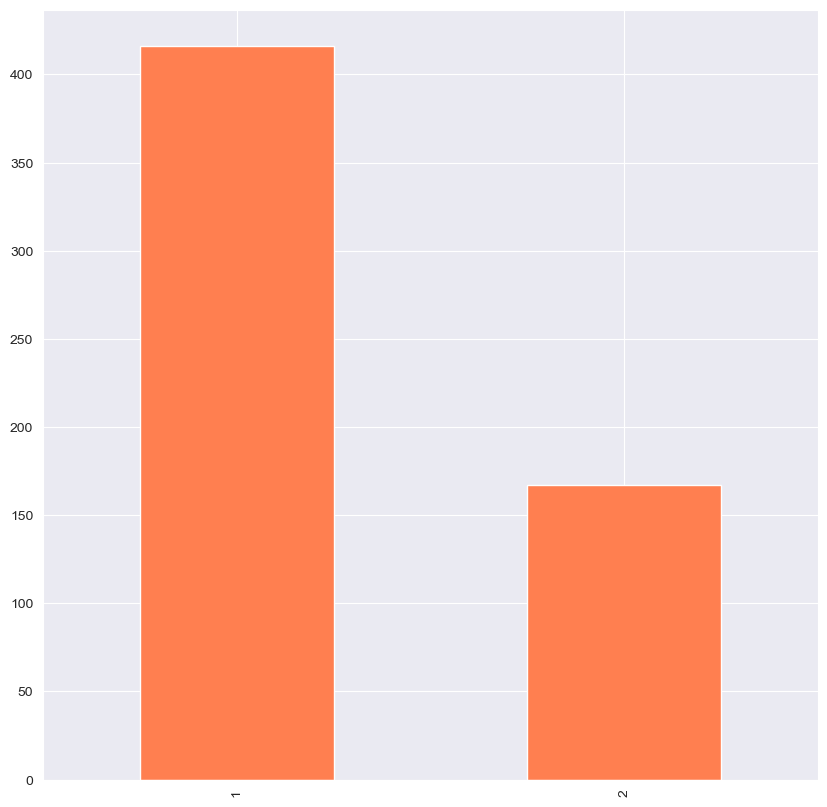

In [64]:
patients['Dataset'].value_counts().plot.bar(color='coral')

In [34]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [35]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [36]:
patients=patients.fillna(0.94)

In [37]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: >

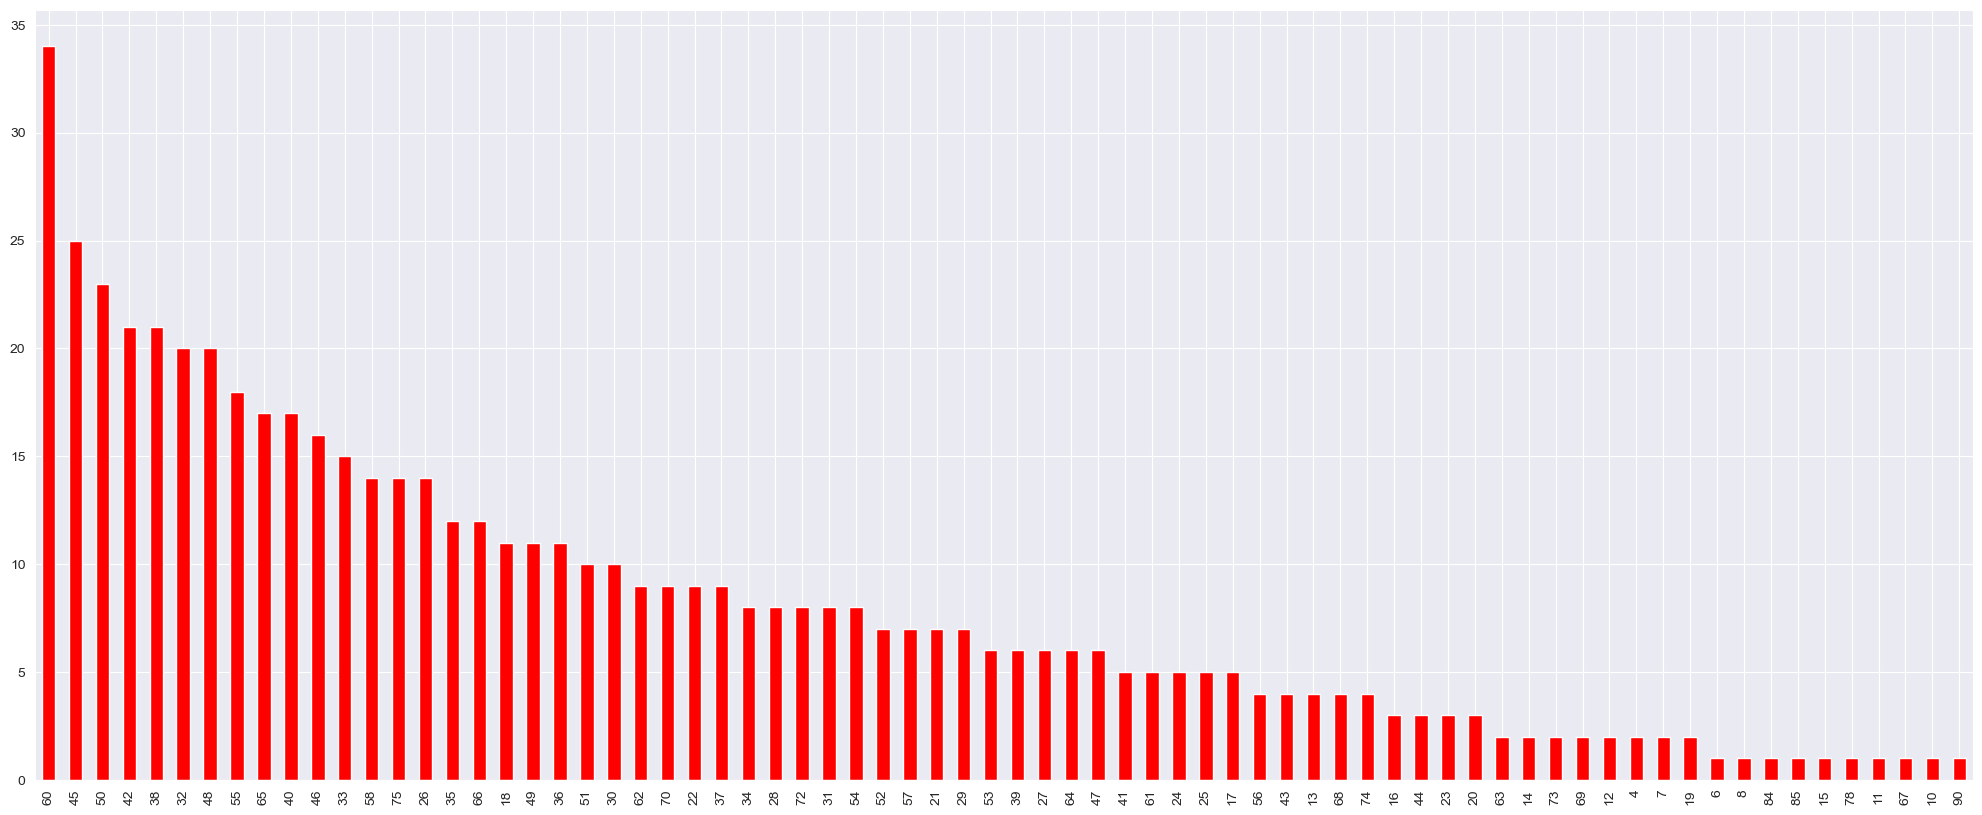

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='red')

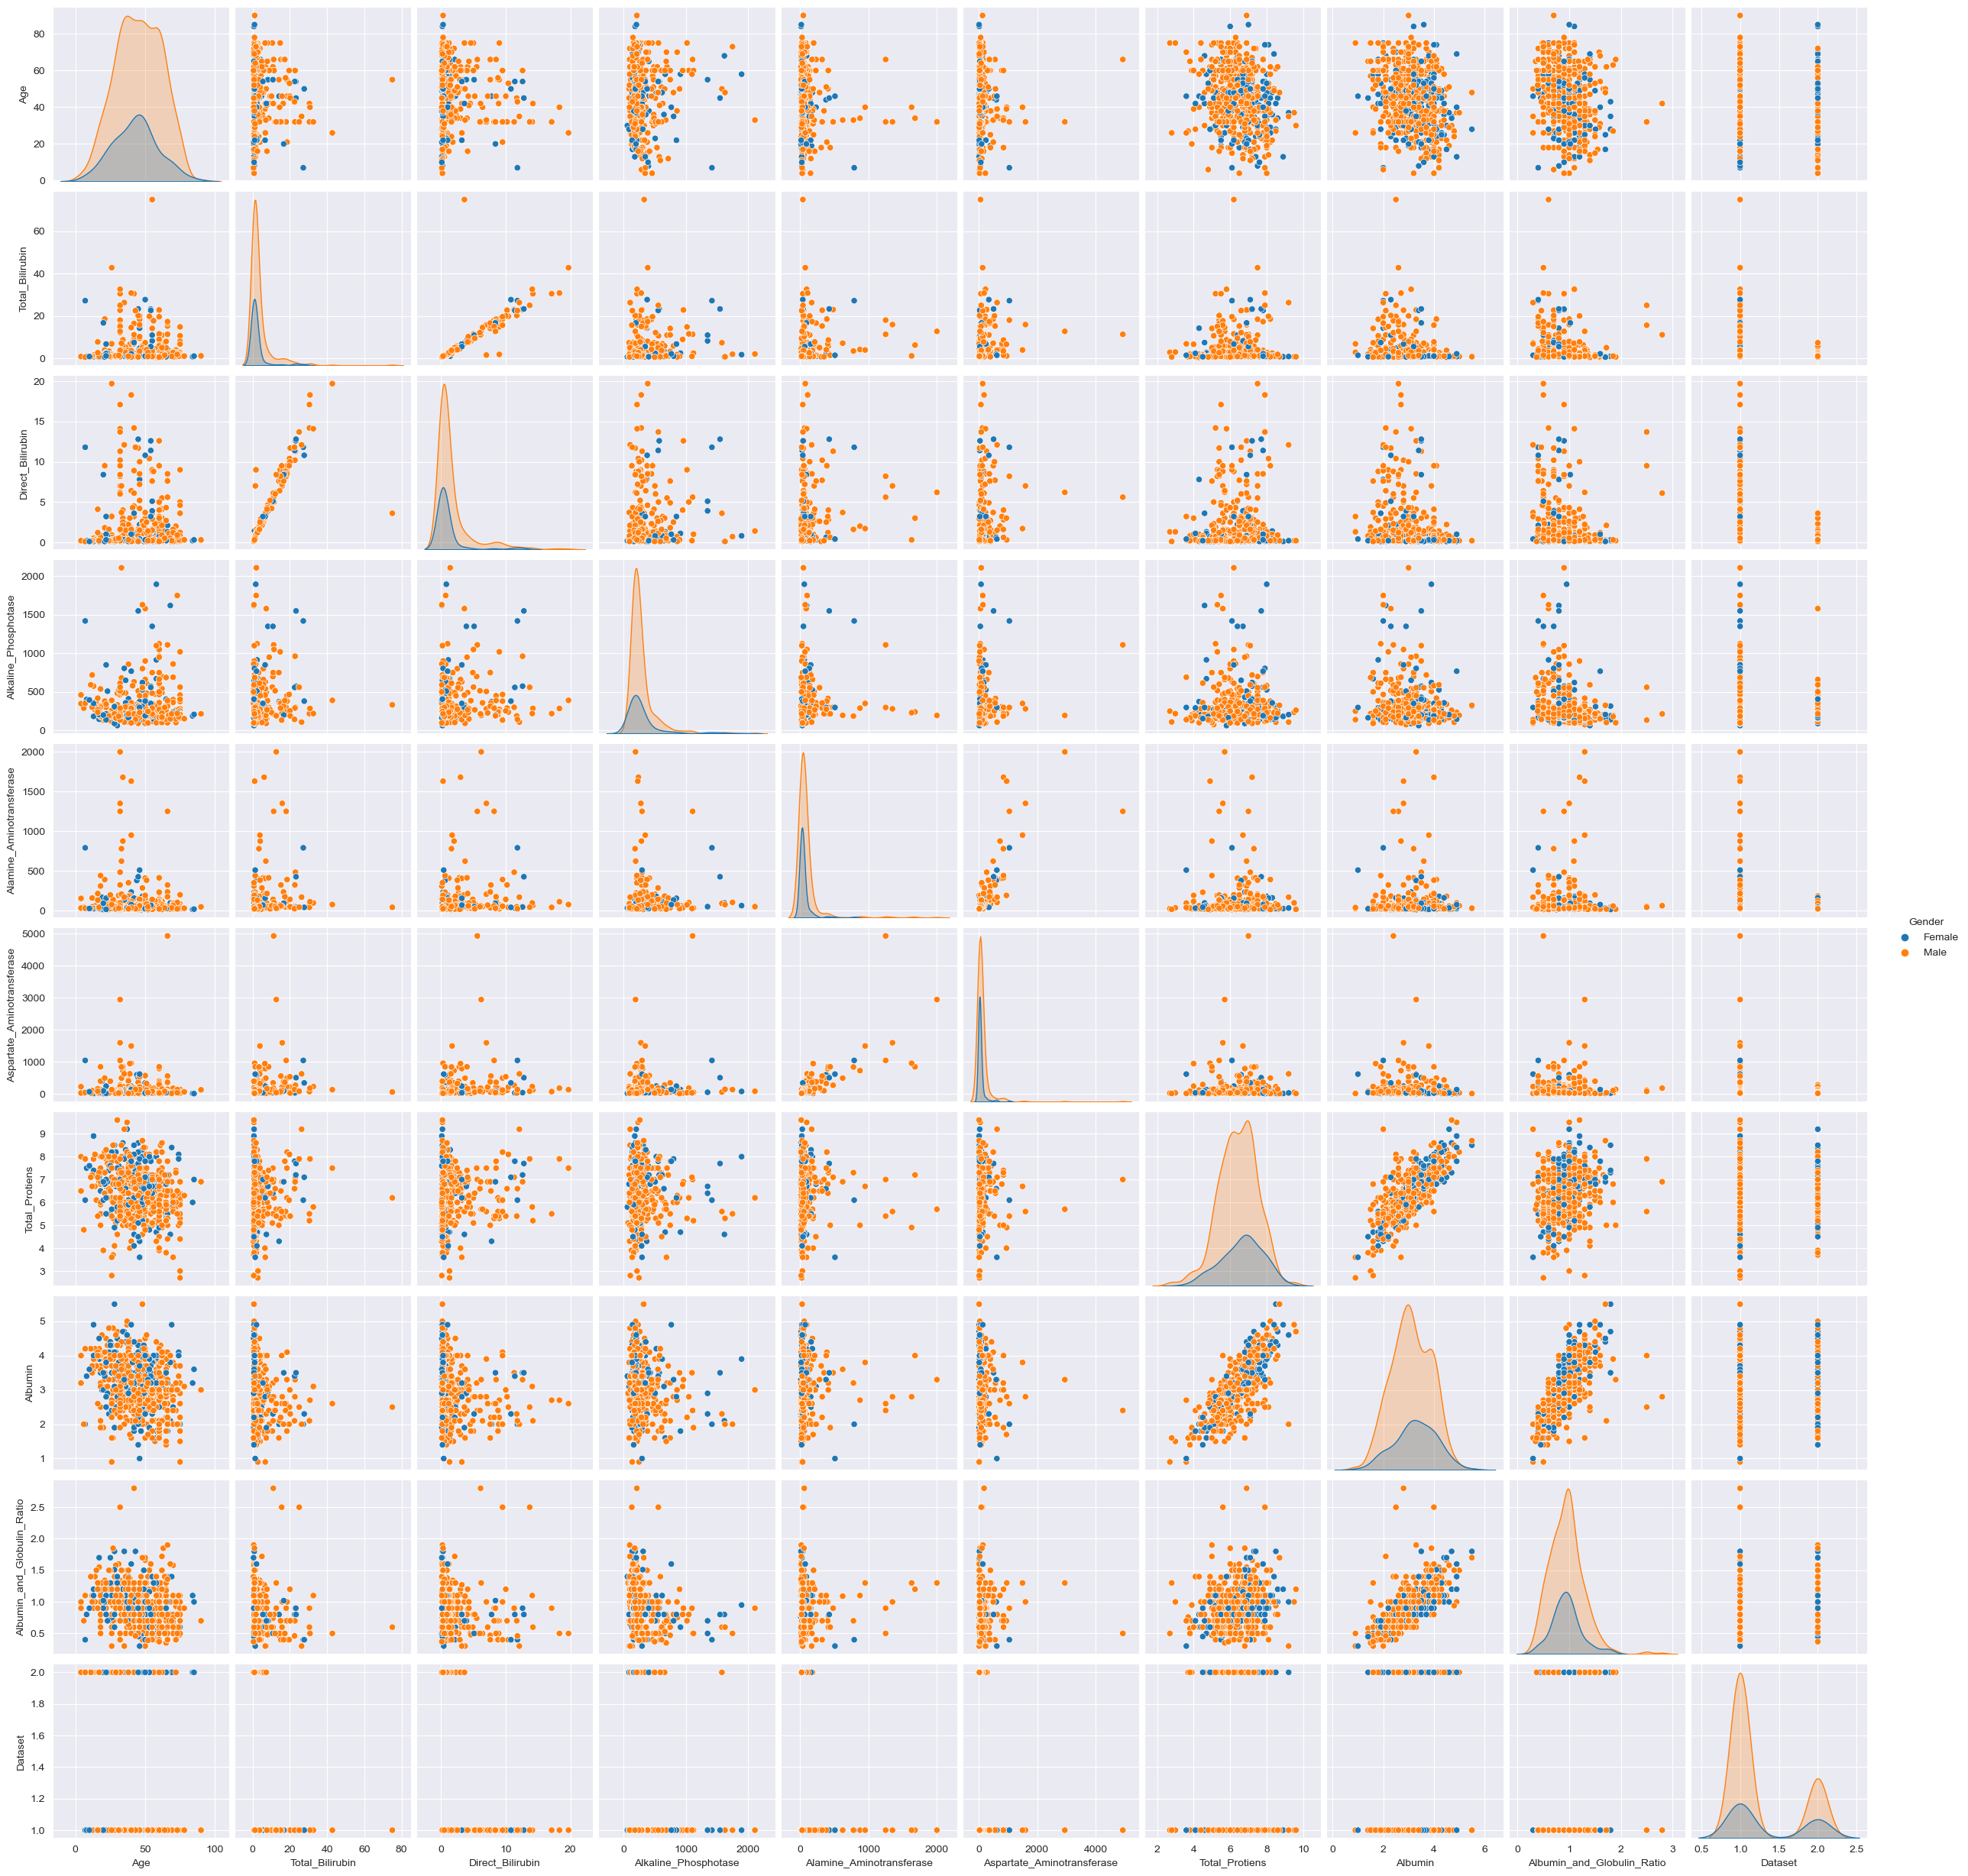

In [41]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

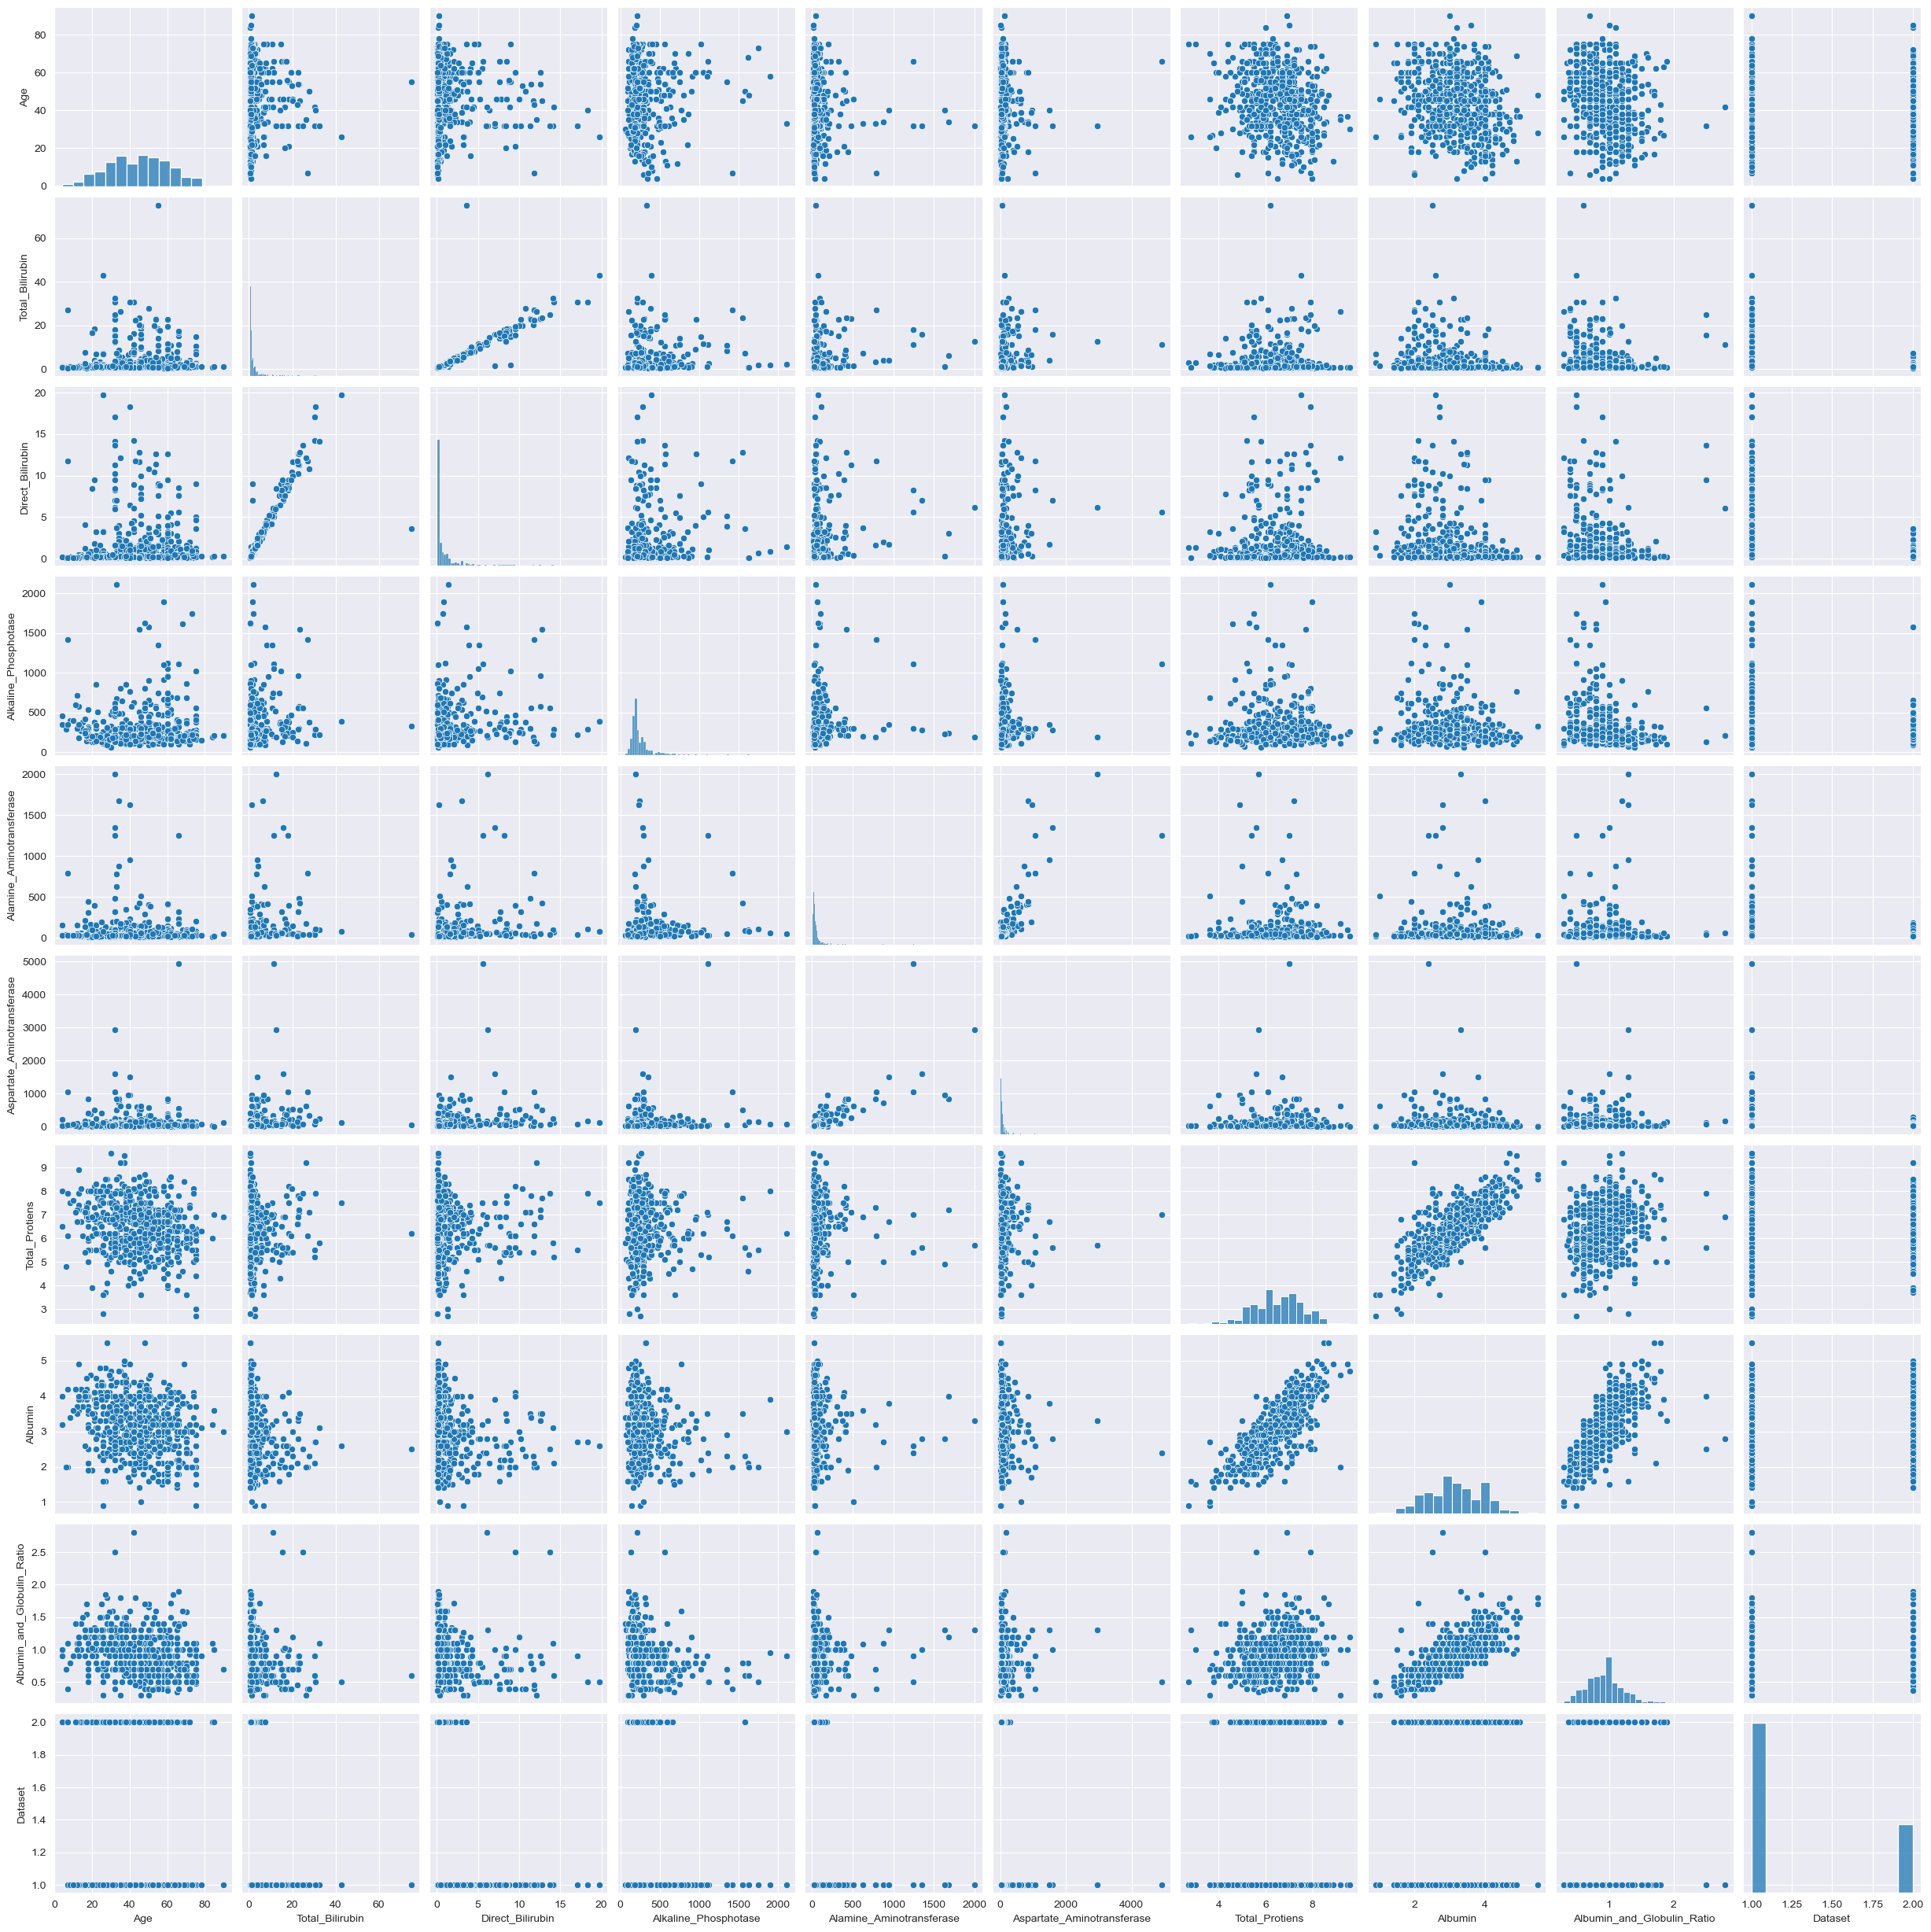

In [42]:
sns.pairplot(patients)

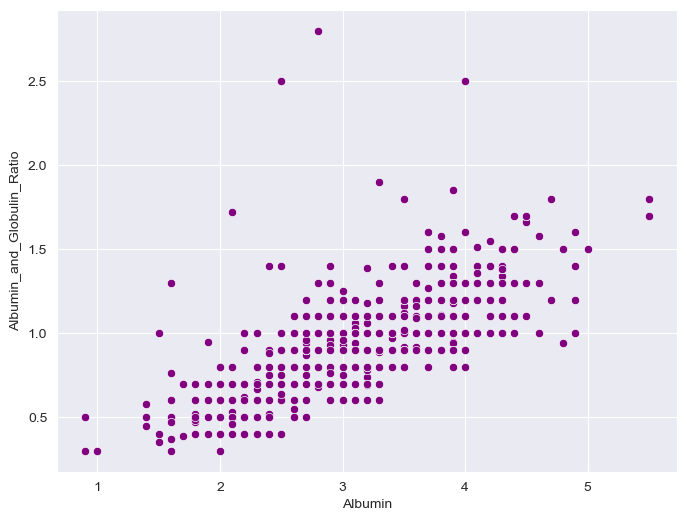

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='purple',data=patients);
plt.show()

<Axes: xlabel='Gender'>

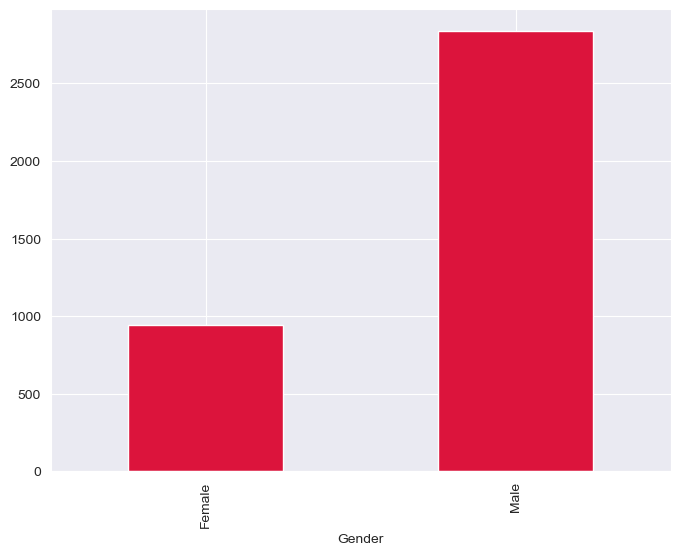

In [52]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='crimson')

<Axes: xlabel='Gender'>

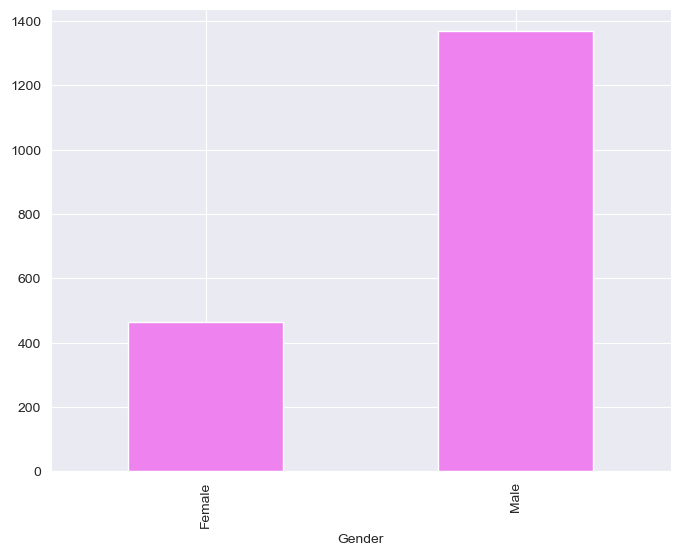

In [80]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='violet')

<Axes: xlabel='Gender'>

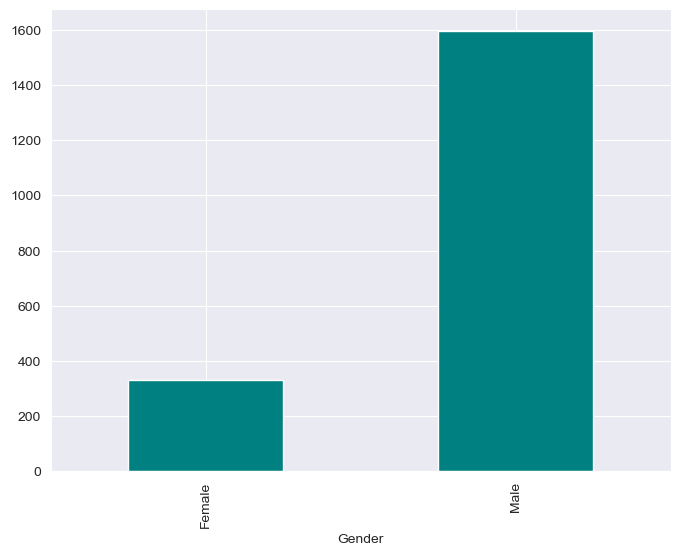

In [63]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='teal')

In [67]:
corr=patients.corr()

<Axes: >

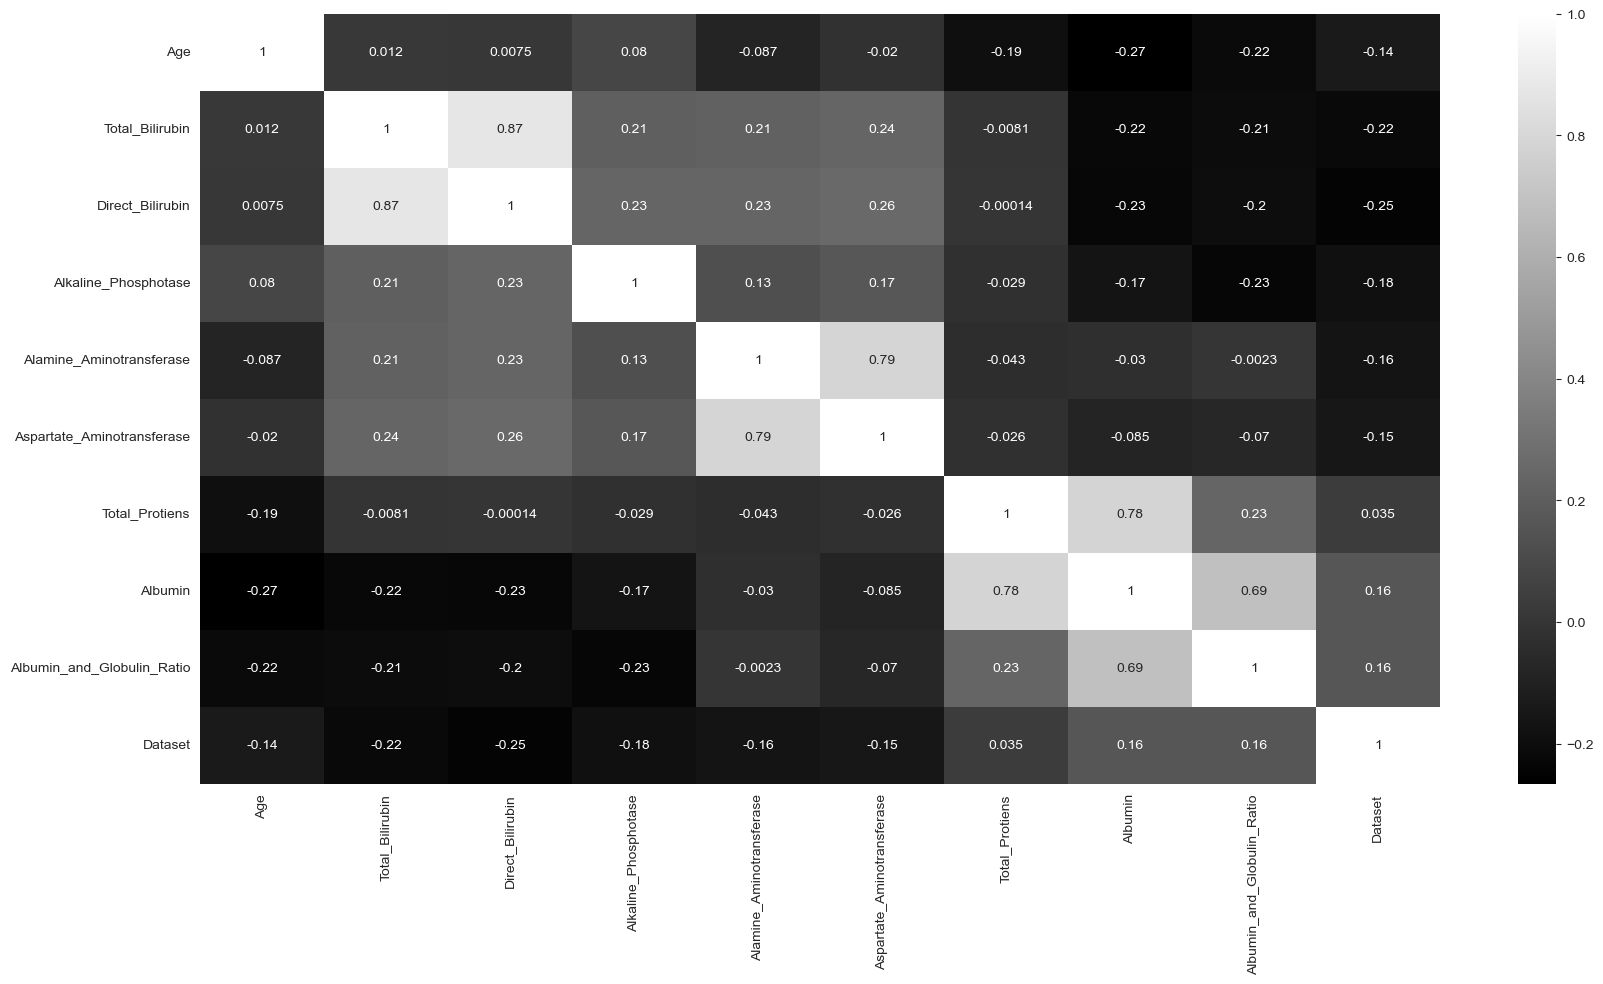

In [77]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="gray",annot=True)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [83]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [88]:
pd.get_dummies(patients['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
